In [1]:
from importlib import reload
from functools import partial
import math

import IPython.display as ipd
import librosa as lr
import librosa.display
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import scipy.stats

import utilty

# %config InlineBackend.figure_format = 'svg'
plt.rcParams['figure.figsize'] = (8, 3)
ipd.display(ipd.HTML("<style>.container { width:100% !important; }</style>"))

Load all 30 second segments of track.

In [2]:
track = utilty.get_audio_tracks()[0]
track = utilty.find_file('scar')

sec = 30
duration = utilty.get_duration(track)
segments = int(duration) // sec
audio_30secs = [lr.load(track, offset=sec*i, duration=sec) 
                for i in range(segments)]

In [3]:
audio, sr = audio_30secs[-1]
# ipd.Audio(data=audio, rate=sr)

In [4]:
# spectrograms_30secs = [utilty.get_spectrograms(audio)
#                        for audio, _ in audio_30secs]

# Harmonic & Percussive Separation

In [5]:
lr.get_duration(audio)

30.0

In [6]:
stft = lr.stft(audio)
harmonic, percussive = lr.decompose.hpss(stft, margin=16)

audio_harm = lr.istft(harmonic)
audio_perc = lr.istft(percussive)

In [7]:
# Get a more isolated percussive component by widening its margin
# audio_harm, audio_perc = librosa.effects.hpss(audio, margin=(1.0,5.0))

In [8]:
# ipd.Audio(lr.effects.harmonic(audio), rate=sr)

In [9]:
# ipd.Audio(audio_harm, rate=sr)

In [10]:
# ipd.Audio(audio_perc, rate=sr)

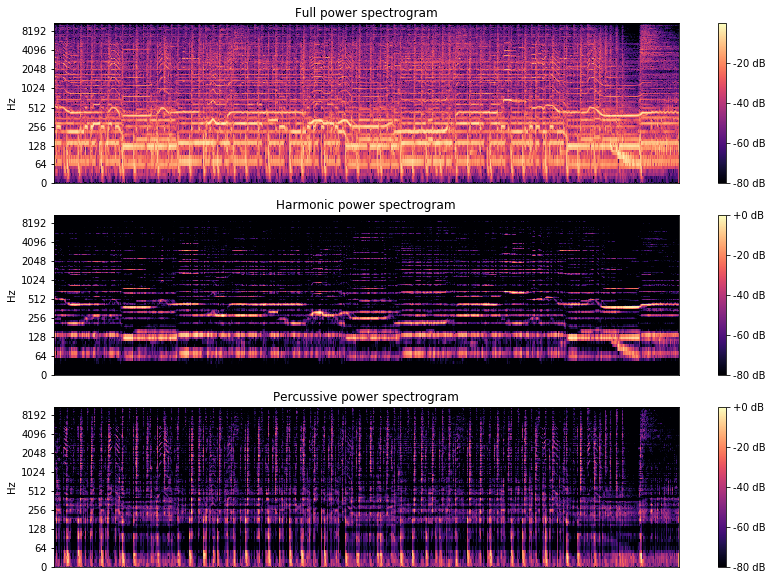

In [11]:
plt.figure(figsize=(14, 10))
plt.subplot(3, 1, 1)
lr.display.specshow(lr.amplitude_to_db(np.abs(stft), ref=np.max), y_axis='log')
plt.colorbar(format='%+2.0f dB')
plt.title('Full power spectrogram')

plt.subplot(3, 1, 2)
lr.display.specshow(lr.amplitude_to_db(np.abs(harmonic), ref=np.max), y_axis='log')
plt.colorbar(format='%+2.0f dB')
plt.title('Harmonic power spectrogram')

plt.subplot(3, 1, 3)
lr.display.specshow(lr.amplitude_to_db(np.abs(percussive), ref=np.max), y_axis='log')
plt.colorbar(format='%+2.0f dB')
plt.title('Percussive power spectrogram');

# Vocal & Instrument separation

In [12]:
foreground, background = utilty.vocal_separation(audio)
stft = lr.stft(audio)

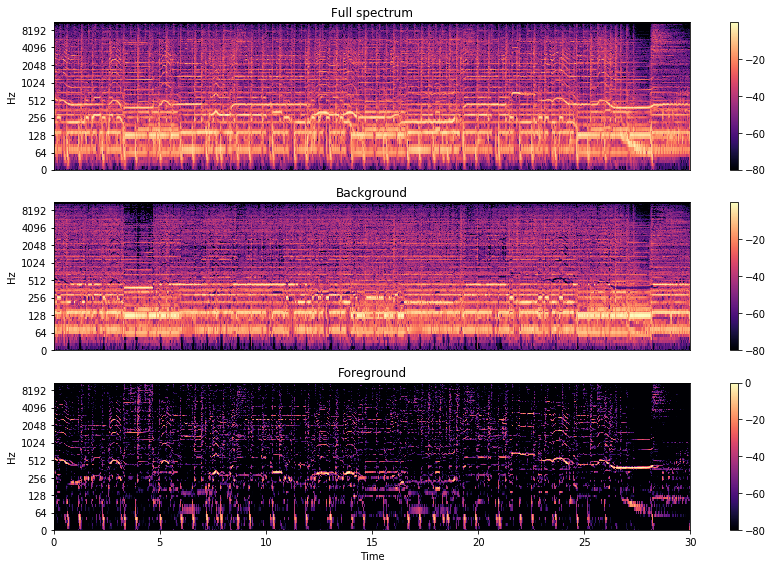

In [13]:
plt.figure(figsize=(12, 8))
plt.subplot(3, 1, 1)
lr.display.specshow(lr.amplitude_to_db(abs(stft), ref=np.max),
                         y_axis='log', sr=sr)
plt.title('Full spectrum')
plt.colorbar()

plt.subplot(3, 1, 2)
lr.display.specshow(lr.amplitude_to_db(background, ref=np.max),
                         y_axis='log', sr=sr)
plt.title('Background')
plt.colorbar()
plt.subplot(3, 1, 3)
lr.display.specshow(lr.amplitude_to_db(foreground, ref=np.max),
                         y_axis='log', x_axis='time', sr=sr)
plt.title('Foreground')
plt.colorbar()
plt.tight_layout()
plt.show()

In [14]:
audio_fg = lr.istft(foreground)
audio_bg = lr.istft(background)

In [15]:
# ipd.Audio(audio, rate=sr)

In [16]:
# ipd.Audio(audio_fg, rate=sr)

In [17]:
# ipd.Audio(audio_bg, rate=sr)

In [18]:
reload(utilty);